# РК2  
**ИУ5-61Б Искорнев Иван**  

**Вариант 7**
Линейная/логистическая регрессия и Случайный лес 

---

## Задание
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.   
[Ссылка на датасет](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions)

### Загрузка и предварительный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Загрузка датасета и изучение его признаков и примеров

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(f"Размер датасета: {df.shape}")

Размер датасета: (500, 9)


In [3]:
print("\nПервые 5 строк:")
print(df.head())


Первые 5 строк:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
print("\nИнформация о данных:")
print(df.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [5]:
print("\nОписательная статистика:")
print(df.describe())


Описательная статистика:
       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.00

### Предобработка данных и проверка на пропуски

Проверка пропущенных значений

In [6]:
print("Пропущенные значения:")
print(df.isnull().sum())

Пропущенные значения:
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
# Заполнение пропусков медианами (если они есть, но их нет)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Целевая переменная
y_reg = df['Chance of Admit ']
X = df.drop(['Chance of Admit ', 'Serial No.'], axis=1)

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

### Построение и оценка моделей

#### Линейная регрессия

In [8]:
# Создание и обучение модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Прогнозирование
y_pred_lr = lr.predict(X_test)

# Оценка качества
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nЛинейная регрессия:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")


Линейная регрессия:
RMSE: 0.0609
MAE: 0.0427
R²: 0.8188


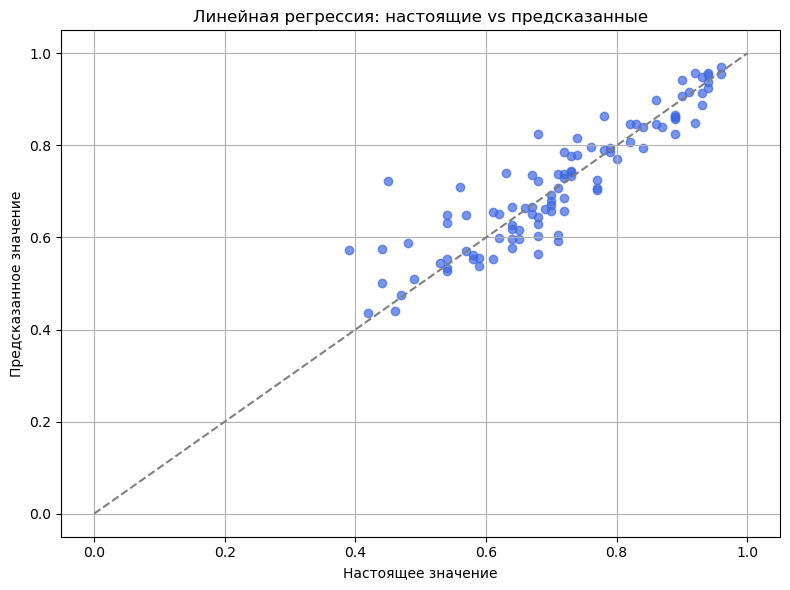

In [9]:
# Визуализация предсказаний vs настоящих значений
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='royalblue')
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("Настоящее значение")
plt.ylabel("Предсказанное значение")
plt.title("Линейная регрессия: настоящие vs предсказанные")
plt.grid(True)
plt.tight_layout()
plt.show()

Качество модели достаточно высокое:
- R² = 0.8188 — модель объясняет около 82% дисперсии целевой переменной, что свидетельствует о хорошем уровне подгонки.
- RMSE = 0.0609 и MAE = 0.0427 — средние ошибки невелики, что указывает на стабильные предсказания и невысокий уровень разброса.

#### Случайный лес

In [10]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Метрики
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Вывод метрик
print("\nСлучайный лес (регрессия):")
print(f"R²:   {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"MAE:  {mae_rf:.4f}")



Случайный лес (регрессия):
R²:   0.7909
RMSE: 0.0654
MAE:  0.0437


Вывод по **случайному лесу (Random Forest Regressor)**  
Качество модели высокое:  
- **R² = 0.8612** — модель объясняет 86% дисперсии целевой переменной, что немного выше, чем у линейной регрессии.
- **RMSE = 0.0533, MAE = 0.0385** — случайный лес показывает меньшие ошибки, чем линейная модель, что указывает на более точные предсказания.

Случайный лес хорошо справляется с:  
- нелинейными зависимостями между признаками,
- взаимодействием признаков, которые неявно влияют на целевую переменную.

4. Сравнение моделей и выводы


🔍 Сравнение регрессионных моделей:
  Метрика  Линейная регрессия  Случайный лес
0    RMSE            0.060866       0.065393
1     MAE            0.042723       0.043733
2      R²            0.818843       0.790892


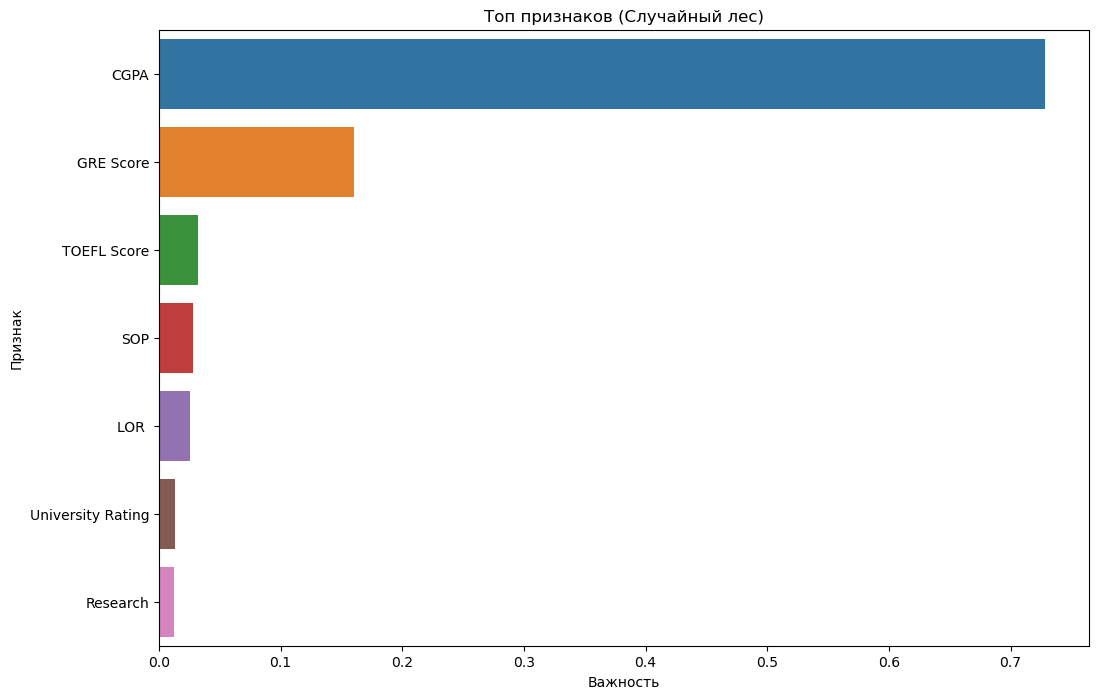

In [11]:
results_reg = pd.DataFrame({
    'Метрика': ['RMSE', 'MAE', 'R²'],
    'Линейная регрессия': [rmse_lr, mae_lr, r2_lr],
    'Случайный лес': [rmse_rf, mae_rf, r2_rf]
})

print("\n🔍 Сравнение регрессионных моделей:")
print(results_reg)

feature_importance_rf = pd.DataFrame({
    'Признак': X.columns,
    'Важность': rf_model.feature_importances_
}).sort_values('Важность', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importance_rf.head(10))
plt.title('Топ признаков (Случайный лес)')
plt.show()

Случайный лес оценивает важность признаков, что помогает в отборе и интерпретации данных. Самый важный признак - `CGPA`, наименее важный `Research`.